Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Reading the data

In [2]:
df = pd.read_csv("/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df.head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Lets get intuition of the data.

*   First check the clealiness of data
*   Summaries the data 










In [3]:
#Checking if the data contain any NUll or Missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


We are all set to work on data 🛠

According to the problem statement, we have 100 sneaker shops, selling sneakers of one model and we are looking a 30days of data. cool!!!

The naively calculated Average Order Value(AOV) is $3145.13(Which is simply the average taken on order_amount), found to be doubtful as the item price are relatively affordable. Before we start with our analyses let's see what exactly is AOV metric is.

According to this [site](https://corporatefinanceinstitute.com/resources/knowledge/ecommerce-saas/average-order-value-aov/) AOV is revenue divided by total number of orders. Since we have 100 stores, will find AOV of each store and average them.






In [4]:
df_aov = df.groupby("shop_id")["order_amount","total_items"].sum().reset_index()
df_aov["aov"] = 0
for i in range(df_aov.shape[0]):
  df_aov["aov"][i] =  df_aov["order_amount"].iloc[[i]]/df_aov["total_items"].iloc[[i]]
round(df_aov["aov"].mean())


408

408 looks good but lets see what five point summary has to say.

In [5]:
#quartiles
quartiles = percentile(df_aov["aov"], [25, 50, 75])

#Min,Max
data_min, data_max = df_aov["aov"].min(), df_aov["aov"].max()

print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 90.000
Q1: 132.750
Median: 153.000
Q3: 168.250
Max: 25725.000


From the above summary, we clearly see skewness, and Data is not normally distributed. The Max value 25725 is causing the skewness in the AOV value we calculated. Let's see what AOV value we get after removing the stores contributing the max value.

In [6]:
df_aov.sort_values(by= ["aov"],ascending=False).head(1)

,shop_id,order_amount,total_items,aov
77,78,2263800,88,25725


Store 78 needs to be investigate as why the average cost of item is so high 🚀

In [7]:
#Removing store 78 
df_aov = df.groupby("shop_id")["order_amount","total_items"].sum().reset_index()
df_aov["aov"] = 0
for i in range(df_aov.shape[0]):
  df_aov["aov"][i] =  df_aov["order_amount"].iloc[[i]]/df_aov["total_items"].iloc[[i]]


df_aov = df_aov[df_aov["shop_id"] != 78]
round(df_aov["aov"].mean())


152

152 looks good, but removing records from data without prior context will give a false answer. One possibility is we can backtrace the origin of data (troubling Data Engineer/Database team 😆) but it is out of scope for now.

let's make use of other central tendency measures to calculate the best possible value without removing the data. 

In [8]:
#Meadian 
df_aov = df.groupby("shop_id")["order_amount","total_items"].sum().reset_index()
df_aov["aov"] = 0
for i in range(df_aov.shape[0]):
  df_aov["aov"][i] =  df_aov["order_amount"].iloc[[i]]/df_aov["total_items"].iloc[[i]]

round(df_aov["aov"].median())


153

In [9]:
#Mode
df_aov = df.groupby("shop_id")["order_amount","total_items"].sum().reset_index()
df_aov["aov"] = 0
for i in range(df_aov.shape[0]):
  df_aov["aov"][i] =  df_aov["order_amount"].iloc[[i]]/df_aov["total_items"].iloc[[i]]

round(df_aov["aov"].mode())


0    153
dtype: int64

**Question 1 Solution:**

**a.Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.**

The AOV calculated was simply the average of the "order_amount" column which resulted in a high value (3145.13). Upon calculating the AOV as per definition we found that the AOV value is $407.99. On further investigating with the help of a five-point summary it was found that the data points are skewed. Since AOV was not able to dampen the effect of outliers, It was better to consider other central tendency measures.



**b.What metric would you report for this dataset?**

I would prefer to go with either median or mode, which dampen the effect of outliers. 


**c.What is its value?**

The value I found is 153



**Question 2 Solution**


How many orders were shipped by Speedy Express in total?

 **54**

SELECT COUNT(*) FROM [Orders] AS A
JOIN [SHIPPERS] AS B ON A.SHIPPERID = B.SHIPPERID
WHERE SHIPPERNAME = 'Speedy Express';


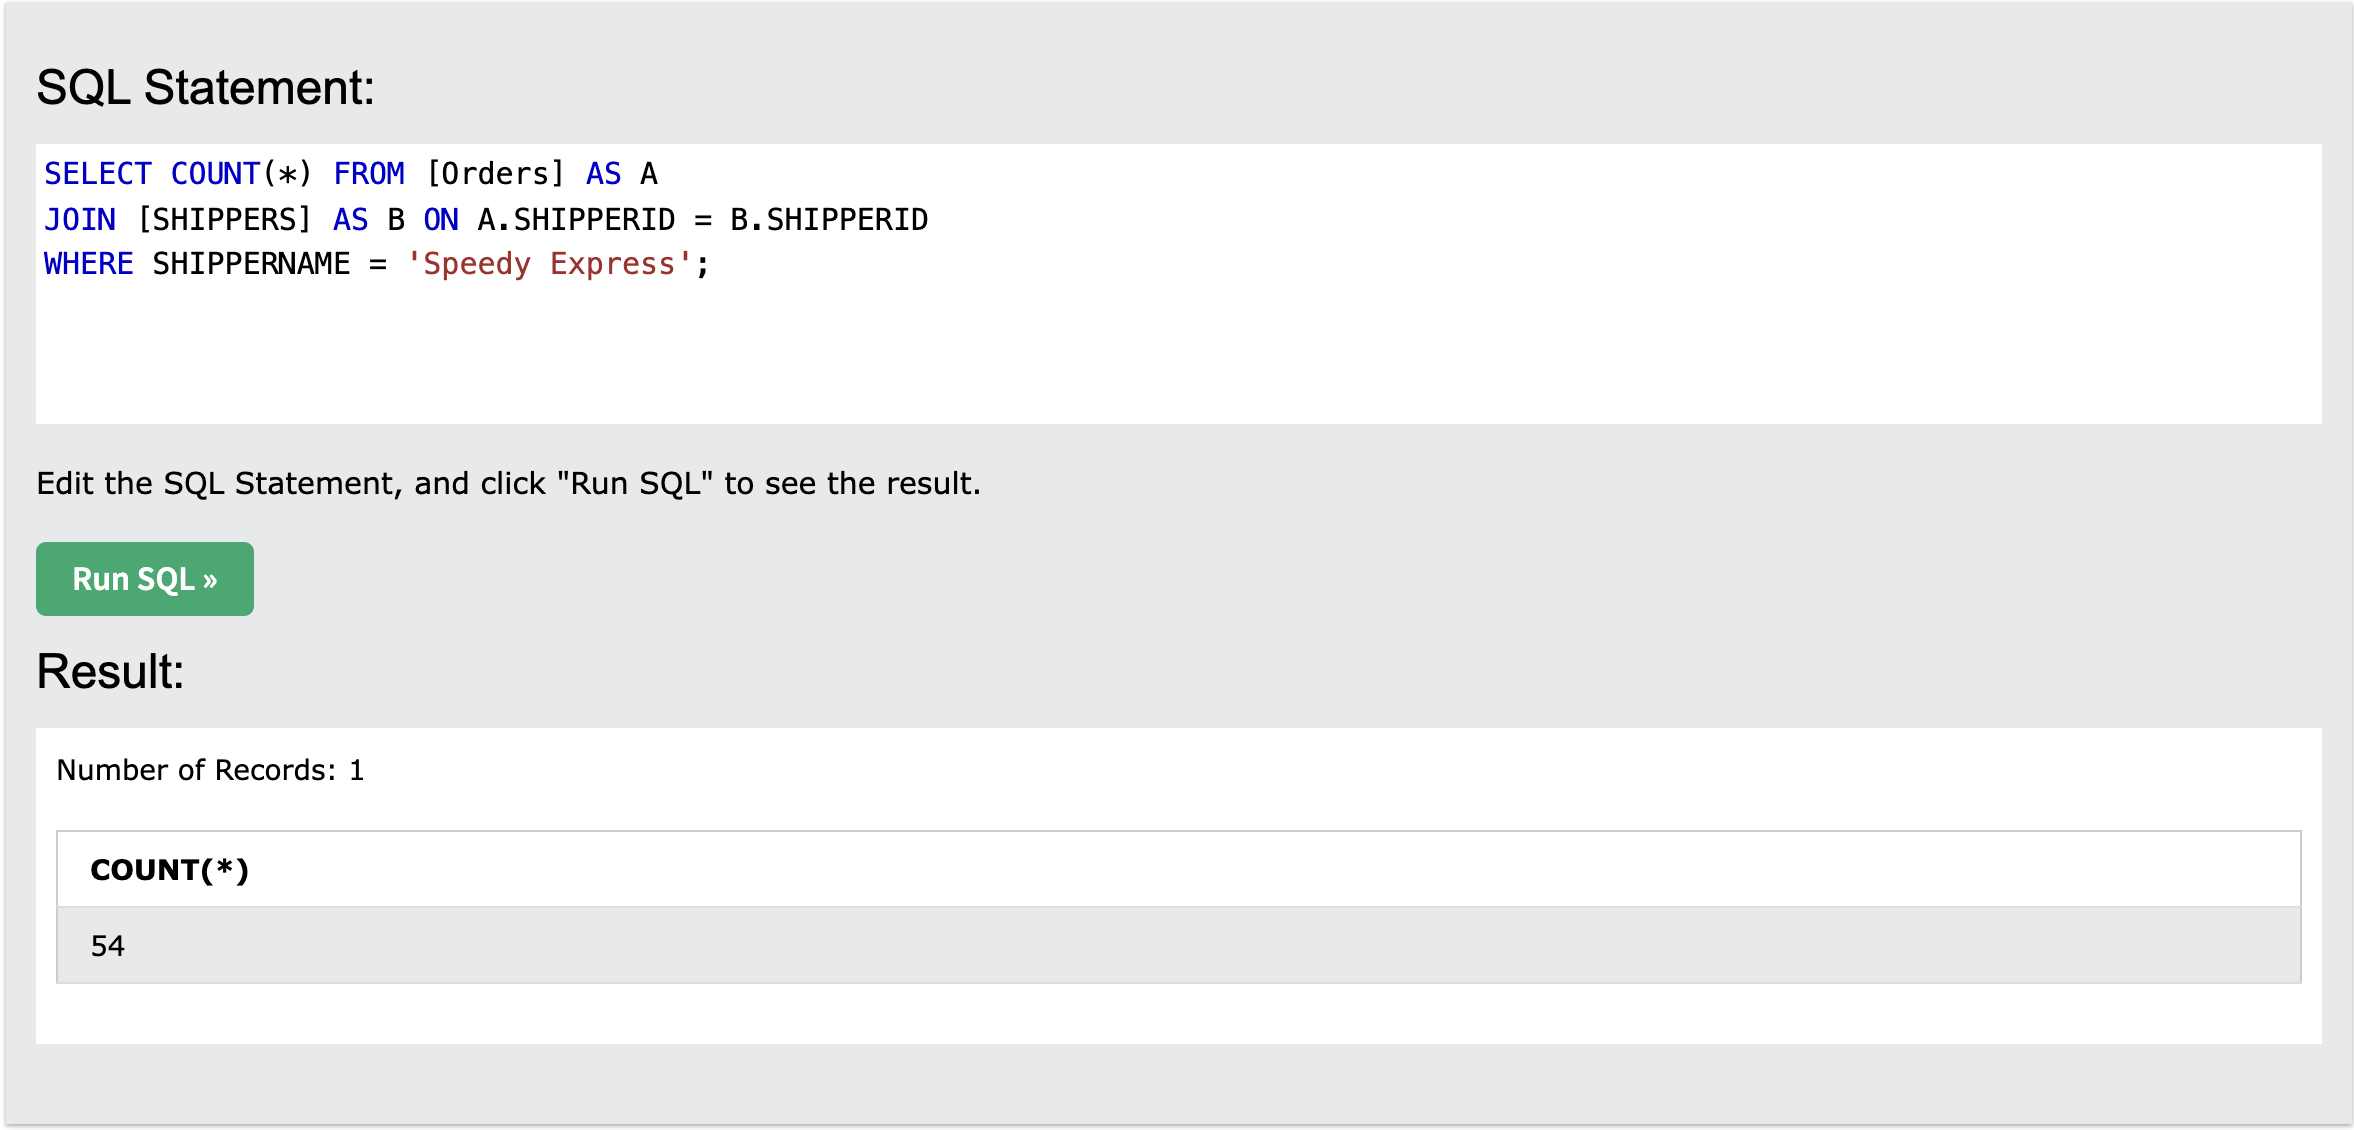


What is the last name of the employee with the most orders?



SELECT LASTNAME FROM EMPLOYEES
WHERE EMPLOYEEID IN 
(SELECT EMPLOYEEID FROM [Orders]
GROUP BY EMPLOYEEID
HAVING COUNT(EMPLOYEEID) == (SELECT COUNT(EMPLOYEEID) FROM [ORDERS] GROUP BY EMPLOYEEID ORDER BY 1 DESC LIMIT 1))

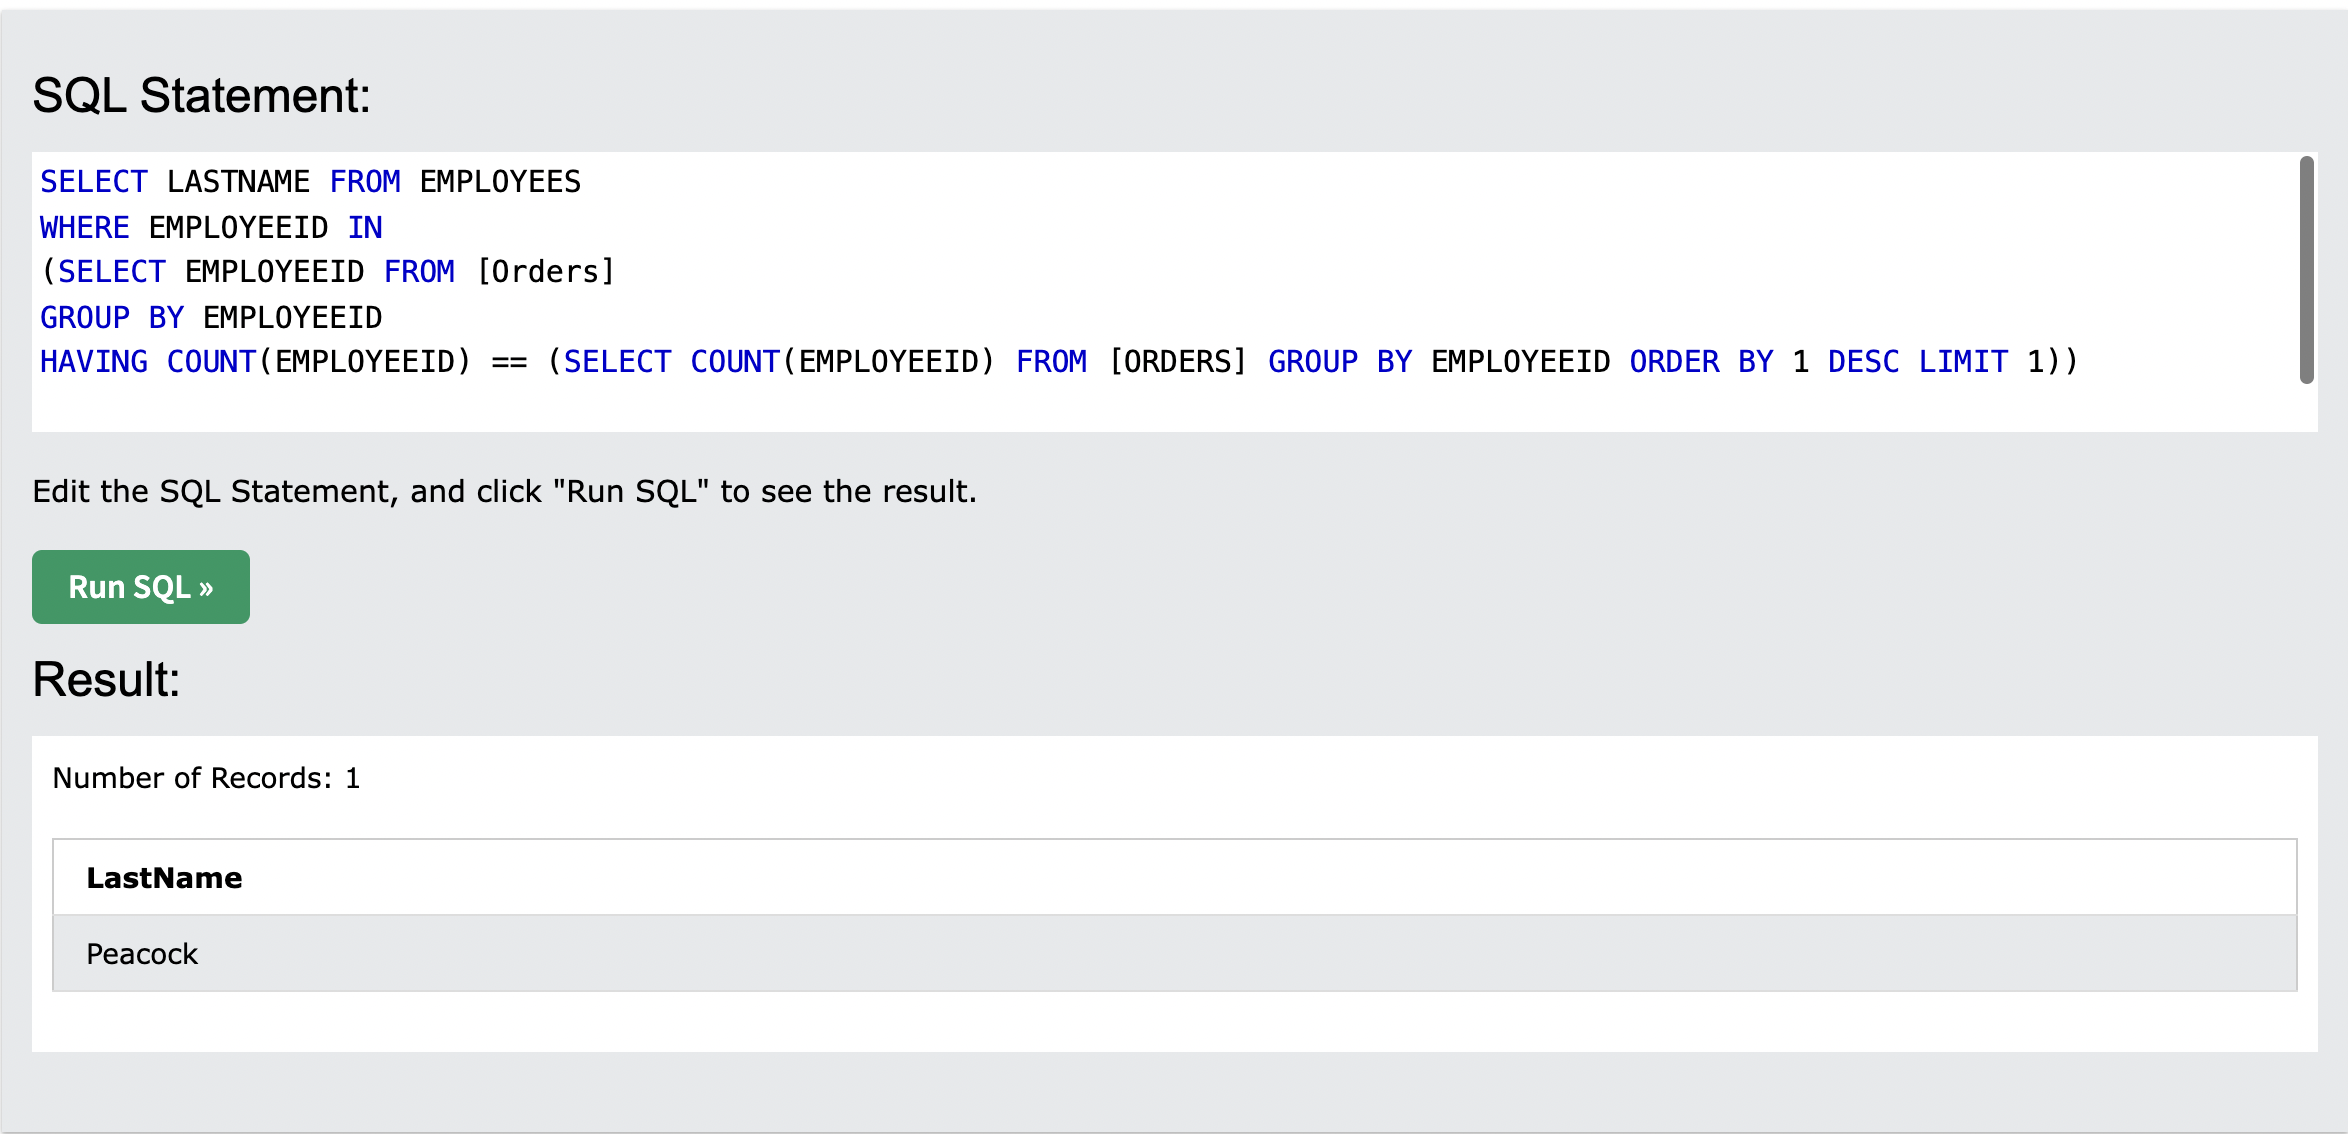




What product was ordered the most by customers in Germany?


SELECT P.PRODUCTNAME,SUM(OD.QUANTITY) AS TOTAL_QUANTITY
FROM CUSTOMERS AS C, ORDERDETAILS AS OD, ORDERS AS O, PRODUCTS AS P
WHERE C.COUNTRY = 'Germany' AND C.CUSTOMERID=O.CUSTOMERID AND O.ORDERID = OD.ORDERID AND P.PRODUCTID = OD.PRODUCTID
GROUP BY PRODUCTNAME
ORDER BY 2 DESC
LIMIT 1;



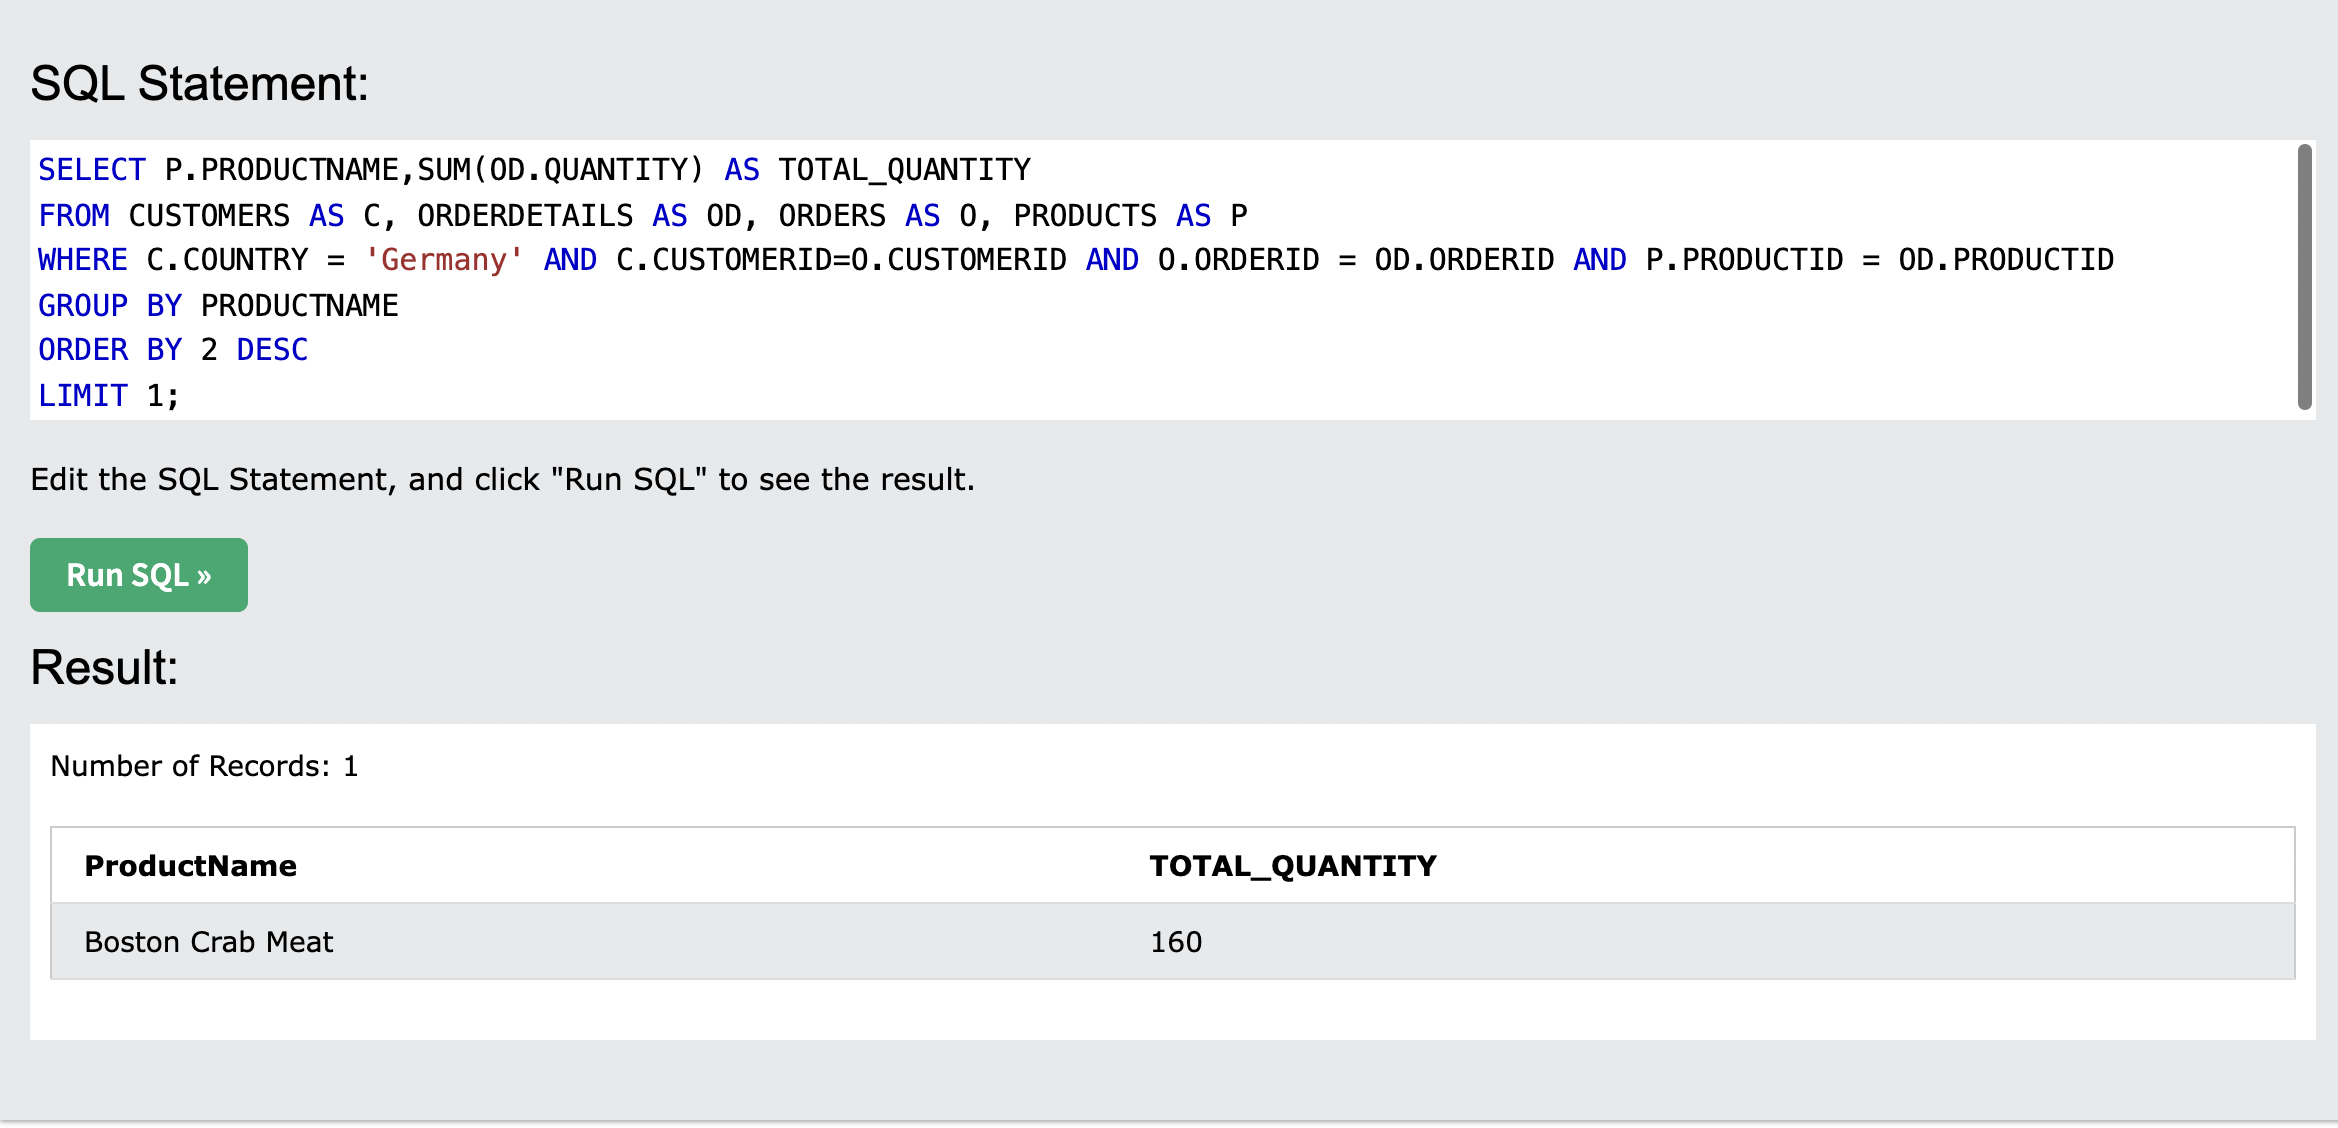
